<h1>Assignment 2: programming</h1>

This is the programming part of Assignment 2. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. There is a theoretical part of the assignment also, found in the Handouts folder on CoCalc, which must be handed in at the <i>start</i> of class on Friday, September 20.

First, run the following code to import packages that we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

<h2>1. Error estimate polynomial</h2>

Let $p(x)$ interpolate $f(x)$ at $x_0,x_1,\ldots,x_k$, where all $x_i\in[-1,1]$. Assume that $f(x)$ has at least $k+1$ continuous derivatives. We know from the interpolation error theorem that, at each $x\in[-1,1]$, the interpolation error $|f(x)-p(x)|$ is bounded above by
\[ |f(x)-p(x)| \le \frac{1}{(k+1)!}\max_{c\in[-1,1]}|f^{(k+1)}(c)||w(x)|,
\qquad \text{ where } \quad w(x)=\prod\limits_{i=0}^k(x-x_i). \]
The only part of this upper bound that we can affect is the $w(x)$ term, which depends on the chosen interpolation points $x_i$.

<h4>a.</h4>
Complete the following function, which computes $w(x)$ for specified values of $x$ and $x_i$. Notice that the definition of $w(x)$ does not include absolute values. Write the function in a vectorized way, so that you can input a NumPy array of $x$ values and get back a corresponding array of $w(x)$ values.

In [2]:
def w(x,xi):
    # INPUTS
    # x is a numpy array of values at which to evaluate w
    # xi is a numpy array of the interpolation points
    # OUTPUT: numpy array of w values corresponing to x
    output_array = []
    for each_x in x:
        product = 1
        for each_xi in xi:
            product*=(each_x-each_xi)
        output_array.append(product)
    return np.array(output_array)

The following code should plot $w(x)$ for 7 and 10 uniformly spaced interplation points. Try some other numbers of uniformly spaced points. As $n$ increases, you should find that $\max_{x\in[-1,1]}|w(x)|$ does decrease, but also that the oscillations of w(x) over $[-1,1]$ become more unequal.

xi: 7 uniformly spaced points


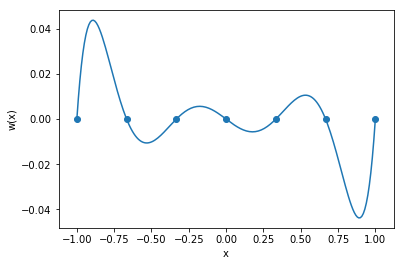

xi: 10 uniformly spaced points


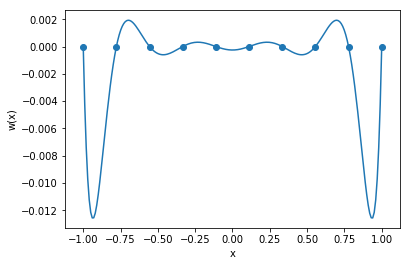

In [3]:
for n in [7,10]:
    print('xi:',n,'uniformly spaced points')
    plt.figure()
    xi = np.linspace(-1,1,n)
    x = np.linspace(-1,1,200)
    y = w(x,xi)
    plt.plot(x,y)
    plt.scatter(xi,np.zeros(np.size(xi)))
    plt.xlabel('x')
    plt.ylabel('w(x)')
    plt.show()

<h4>b.</h4>
Complete the following function, which returns a NumPy array of Chebyshev nodes of the 1st kind $(x_1,\ldots,x_n)$ for a specified value of $n$. Note that here the index of $x_i$ starts at 1 rather than 0, to be consistent with the usual notation for the nodes of the 1st kind. So there are $n$ interpolation points in total, not $n+1$. It's a good idea to test your function for some small $n$ values where you know the answer.

In [4]:
def cheb_nodes1(n):
    # INPUT: number of nodes to return
    # OUTPUT: numpy array containing the Chebyshev nodes [x1,...,xn]
    nodes_array = []
    for k in range(1,n+1):
        node = np.cos((2*k-1)/(2*n)*np.pi)
        nodes_array.append(node)
    return np.array(nodes_array)
    
    # your code here

The following code should plot $w(x)$ for 4, 9, and 20 interpolation points that are Chebyshev nodes of the 1st kind. Try some other numbers of uniformly spaced points. The correct $w(x)$ will equioscillate over the interval $[-1,1]$.

xi: 4 Chebyshev nodes of the 1st kind


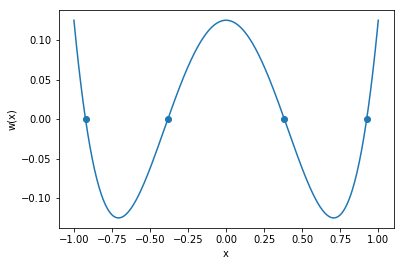

xi: 9 Chebyshev nodes of the 1st kind


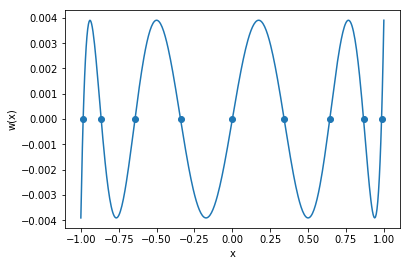

xi: 20 Chebyshev nodes of the 1st kind


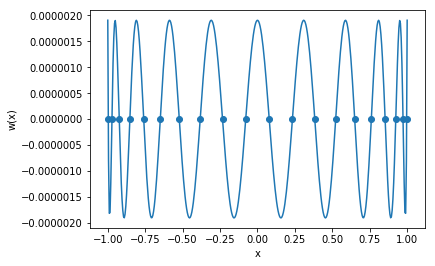

In [5]:
for n in [4,9,20]:
    print('xi:',n,'Chebyshev nodes of the 1st kind')
    plt.figure()
    xi = cheb_nodes1(n)
    x = np.linspace(-1,1,400)
    y = w(x,xi)
    plt.plot(x,y)
    plt.scatter(xi,np.zeros(np.size(xi)))
    plt.xlabel('x')
    plt.ylabel('w(x)')
    plt.show()

<h4>c.</h4>
Complete the following function, whose input is a NumPy array of the interpolation points $x_i$, and whose output is the approximate value of $\max\limits_{x\in[-1,1]}|w(x)|$. Estimate this maximum by computing $|w(x)|$ at 2000 uniformly spaced points on $[-1,1]$.

In [6]:
def w_max(xi):
    # INPUT: xi is a numpy array of interpolation points
    # OUTPUT: a number approximating the maximum of |w(x)| over [-1,1]
    x = np.linspace(-1,1,2000)
    # your code here
    w_array = np.absolute(w(x,xi))
    return np.max(w_array)


You can test your <tt>w_max</tt> function using the case where the $x_i$ are Chebyshev nodes of the 1st kind because in this case we know the exact value of $\max\limits_{x\in[-1,1]}|w(x)|$.

<h4>d.</h4>
Using your functions from parts 1a-c, compute $\max\limits_{x\in[-1,1]}|w(x)|$ for $n$ uniformly spaced nodes $x_i$ on $[-1,1]$, where $n=5,10,15,\ldots,40$. Do the same for Chebyshev nodes of the 1st kind. Use the <tt>plt.scatter</tt> command to plot $\max\limits_{x\in[-1,1]}|w(x)|$ versus $n$. The code provided below should put the points for uniform nodes and Chebyshev nodes on the same plot, with the vertical axis scale logarithmic and the horizontal axis scale linear. (Note that I put the <tt>plt.yscale('log')</tt> command <i>before</i> the plotting commands, which can help the automatic selection of axis ranges to work properly. If the axis ranges are still not good, you can always set them manually.)

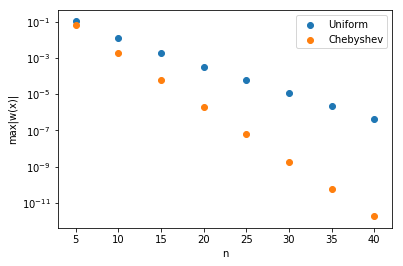

In [7]:
n = np.array([5,10,15,20,25,30,35,40])
wmax_unif = np.empty(len(n))
wmax_cheb1 = np.empty(len(n))
# Write code below so that:
#     wmax_unif[i] is the w_max value for n[i] uniformly spaced points
#     wmax_cheb1[i] is the w_max value for n[i] Chebyshev nodes of the 1st kind
# your code here
for i in range(len(n)):
    xi1 = np.linspace(-1,1,n[i])
    wmax_unif[i] = w_max(xi1)
    xi2 = cheb_nodes1(n[i])
    wmax_cheb1[i] = w_max(xi2)


# The code below should plot your results on a linear-log plot
plt.figure()
plt.yscale('log')
plt.scatter(n,wmax_unif,label='Uniform')
plt.scatter(n,wmax_cheb1,label='Chebyshev')
plt.xlabel('n')
plt.ylabel('max|w(x)|')
plt.legend()
plt.show()

<h2>2. Interpolation error with uniformly spaced points</h2>

If you want, you can use the following function to perform polynomial interpolation. Or you can replace it with your own function from Assignment 1.

In [8]:
def lagrange_interp(x,xi,yi):
    P = np.zeros(np.size(x))
    for i in range(0 , len(xi) ):
        L = 1
        for j in range(0 , len(xi) ):
            if i != j: 
                L *= (x-xi[j]) / (xi[i]-xi[j])
        P += yi[i] * L
    return P

<h4>a.</h4>
Let $f(x)=\sin(4\pi x^2)$. Let $p$ interpolate $f$ at $n$ <b>uniform</b> points on $[-1,1]$. The following code should plot $f(x)$ and $p(x)$, along with the interpolation error $f(x)-p(x)$, making separate plots for $n=10,20,30$

xi: 10 uniformly spaced points


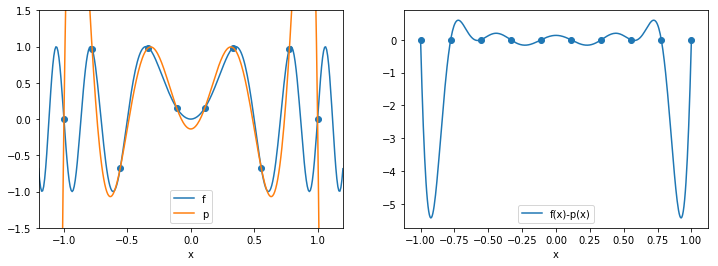

xi: 20 uniformly spaced points


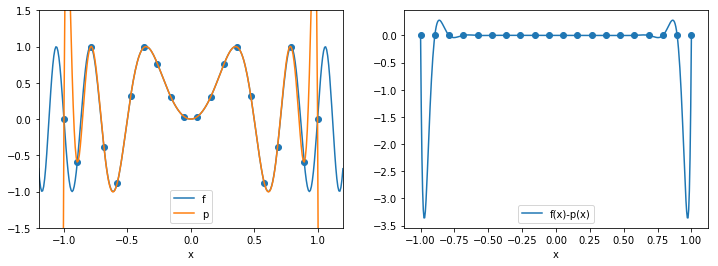

xi: 30 uniformly spaced points


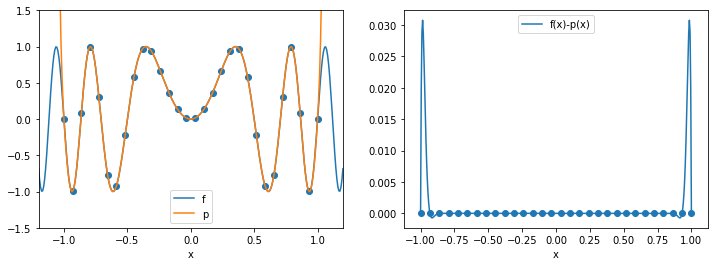

In [9]:
def f(x): return np.sin(4*np.pi*x**2)

x = np.linspace(-1.2,1.2,300)
for n in [10,20,30]:
    print('xi:',n,'uniformly spaced points')
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(x,f(x),label='f')
    xi = np.linspace(-1,1,n)
    plt.plot(x,lagrange_interp(x,xi,f(xi)),label='p')
    plt.scatter(xi,f(xi))
    plt.xlabel('x')
    plt.axis([-1.2,1.2,-1.5,1.5])
    plt.legend()
    
    plt.subplot(1,2,2)
    xerr = np.linspace(-1,1,400)
    plt.plot(xerr,f(xerr)-lagrange_interp(xerr,xi,f(xi)),label='f(x)-p(x)')
    plt.scatter(xi,np.zeros(np.size(xi)))
    plt.xlabel('x')
    plt.legend()
    plt.show()

Let's study how the worst-case interpolation error,
$$\Vert f-p\Vert_\infty:=\max\limits_{x\in[-1,1]}|f(x)-p(x)|,$$ depends on $n$ in the example. To do so, let's approximate $\Vert f-p\Vert_\infty$ by computing $|f(x)-p(x)|$ at 2000 uniformly spaced points on $[-1,1]$. In particular, compute $\Vert f-p\Vert_\infty$ for the $p$ that interpolates $f$ at $n$ uniform points, for $n=5,10,15,\ldots,40$. Then, plot a <tt>scatter</tt> of $\Vert f-p\Vert_\infty$ versus $n$. Make the vertical $\Vert f-p\Vert_\infty$ axis logarithmic and the $n$ axis linear. (If necessary, set the range of the axes manually to show all the data.)

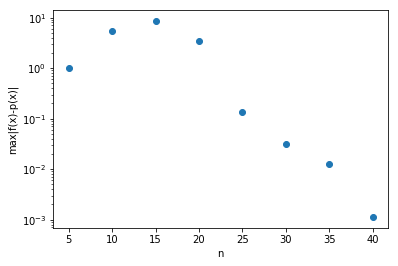

In [10]:
# your code here
n = np.array([5,10,15,20,25,30,35,40])
xerr = np.linspace(-1,1,2000)

result_array =[]
for i in range(len(n)):
    xi=np.linspace(-1,1,n[i])
    error_array = np.array(f(xerr)-lagrange_interp(xerr,xi,f(xi)))
    result_array.append(np.max(np.absolute(error_array)))
    
plt.figure()
plt.yscale('log')
plt.scatter(n,result_array)
plt.xlabel('n')
plt.ylabel('max|f(x)-p(x)|')
# plt.legend()
plt.show()


<h4>b.</h4>
Let $f(x)=\sin(4\pi x^2)$, as in part a. Let $p$ interpolate $f$ at $n$ <b>Chebyshev</b> nodes of the 1st kind. The following code should plot $f(x)$ and $p(x)$, along with ther interpolation error $f(x)-p(x)$, making separate plots for $n=10,20,30$. You'll notice that the error doesn't exactly equioscillate since $p$ is not exactly the best approximation of this particular $f$, but the error comes much closer to equioscillating than it does when the $x_i$ are uniform.

xi: 10 Chebyshev nodes of the 1st kind


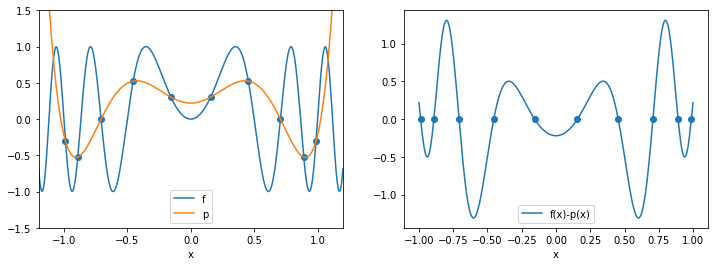

xi: 20 Chebyshev nodes of the 1st kind


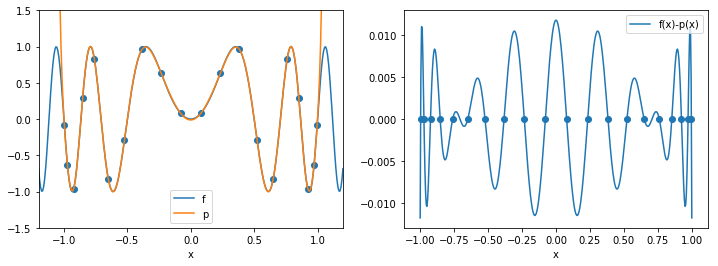

xi: 30 Chebyshev nodes of the 1st kind


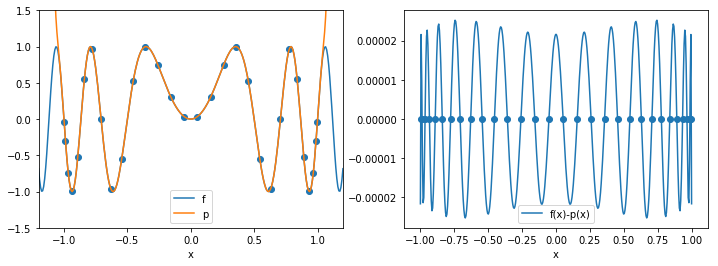

In [11]:
def f(x): return np.sin(4*np.pi*x**2)
# def f(x): return np.sin(4*np.pi*x**2)

x = np.linspace(-1.2,1.2,300)
for n in [10,20,30]:
    print('xi:',n,'Chebyshev nodes of the 1st kind')
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(x,f(x),label='f')
    xi = cheb_nodes1(n)
    plt.plot(x,lagrange_interp(x,xi,f(xi)),label='p')
    plt.scatter(xi,f(xi))
    plt.xlabel('x')
    plt.axis([-1.2,1.2,-1.5,1.5])
    plt.legend()
    
    plt.subplot(1,2,2)
    xerr = np.linspace(-1,1,400)
    plt.plot(xerr,f(xerr)-lagrange_interp(xerr,xi,f(xi)),label='f(x)-p(x)')
    plt.scatter(xi,np.zeros(np.size(xi)))
    plt.xlabel('x')
    plt.legend()
    plt.show()

Repeat part 2a for the case of Chebyshev nodes. That is, plot $\Vert f-p\Vert_\infty$ versus $n$ for $n=5,10,\ldots,40$.

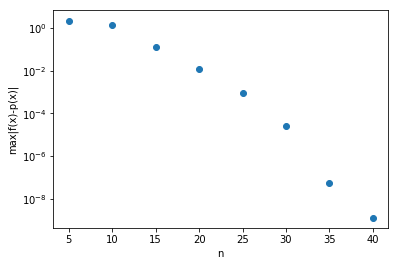

In [12]:
# your code here
n = np.array([5,10,15,20,25,30,35,40])
xerr = np.linspace(-1,1,2000)

result_array =[]
for i in range(len(n)):
    xi=cheb_nodes1(n[i]) 
    error_array = np.array(f(xerr)-lagrange_interp(xerr,xi,f(xi)))
    result_array.append(np.max(np.absolute(error_array)))
    
plt.figure()
plt.yscale('log')
plt.scatter(n,result_array)
plt.xlabel('n')
plt.ylabel('max|f(x)-p(x)|')
plt.show()